In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")
train_data.set_index('PassengerId',inplace = True)
test_data.set_index('PassengerId',inplace = True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### As ~80% data is null dropping cabin

In [4]:
train_data.drop('Cabin', axis = 1, inplace = True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,S


#### A heatmap of null values

<AxesSubplot: ylabel='PassengerId'>

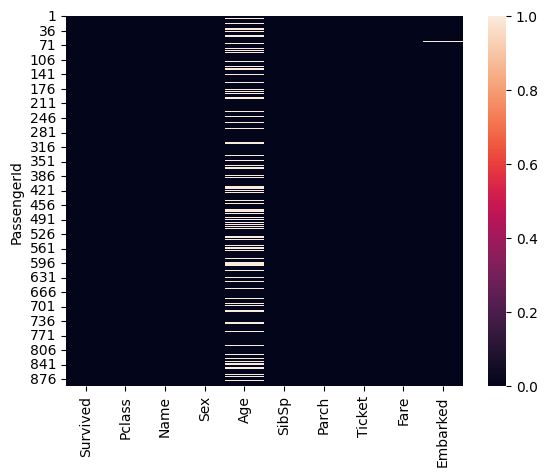

In [5]:
sns.heatmap(train_data.isnull())

#### lets find the relationship between the age and pclass

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

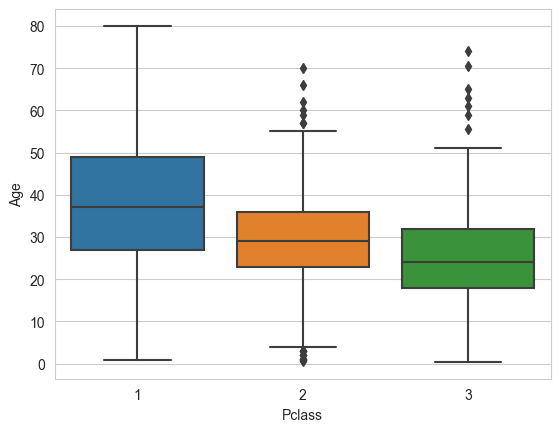

In [6]:
sns.set_style("whitegrid")
sns.boxplot(data = train_data, y = 'Age', x = 'Pclass')

#### From the above box plot we can assume if:
#### Pclass = 1 => Age = 37
#### Pclass = 2 => Age = 29
#### Pclass = 3 => Age = 24

#### lets try to impute the following values

In [7]:
def impute_vals(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [8]:
train_data.Age = train_data[['Age','Pclass']].apply(impute_vals,axis = 1)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,24.0,1,2,W./C. 6607,23.4500,S


<AxesSubplot: ylabel='PassengerId'>

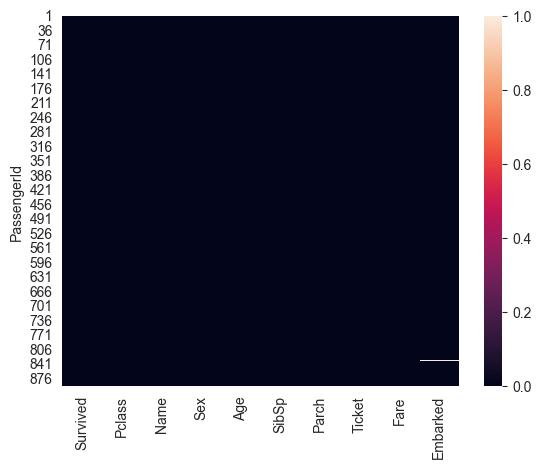

In [9]:
sns.heatmap(train_data.isnull())

#### A countplot showing relationship of gender and survival of passengers

<AxesSubplot: xlabel='Sex', ylabel='count'>

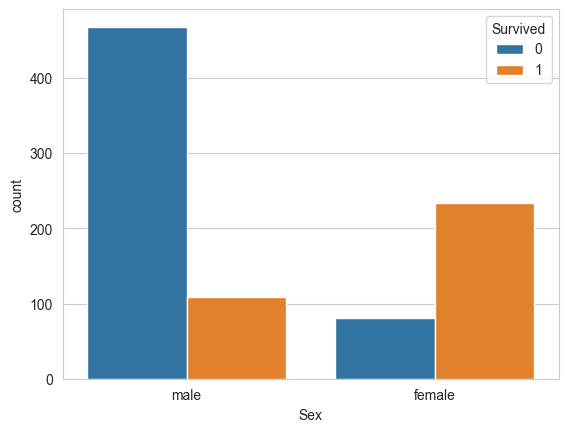

In [10]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train_data)

#### A countplot showing relationship of location of embarking the journey and survival of passengers

<AxesSubplot: xlabel='Embarked', ylabel='count'>

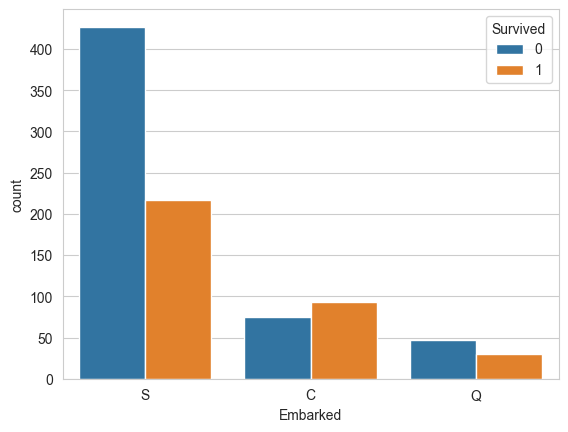

In [11]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data)

#### A countplot showing relationship of location of embarking the journey and class of passengers

<AxesSubplot: xlabel='Embarked', ylabel='count'>

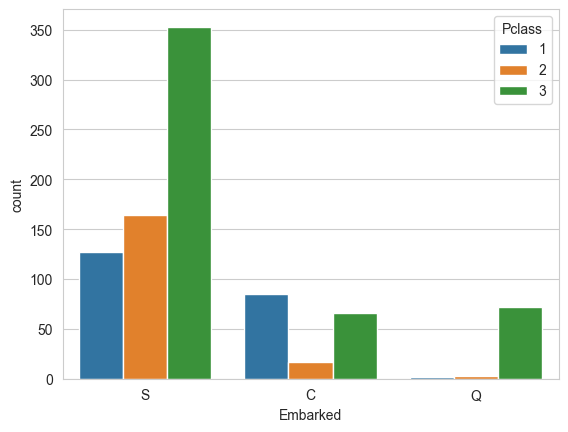

In [12]:
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train_data)

#### A countplot showing relationship of class and survival of passengers

<AxesSubplot: xlabel='Pclass', ylabel='count'>

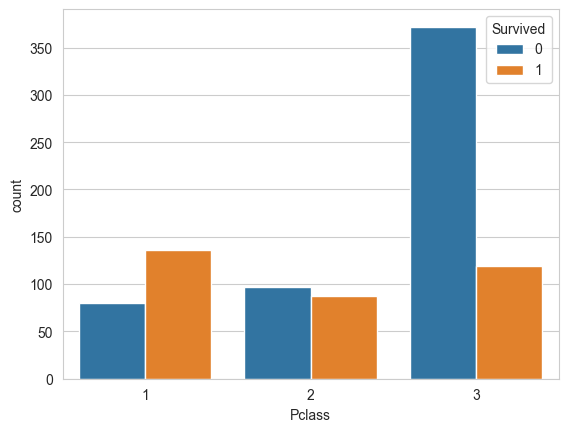

In [13]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data)

#### Lets add a new feature of family size

In [14]:
train_data['Family Size'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,24.0,1,2,W./C. 6607,23.4500,S,4


#### a count plot of what differnce the size of a passengers family made to their survival

<AxesSubplot: xlabel='Family Size', ylabel='count'>

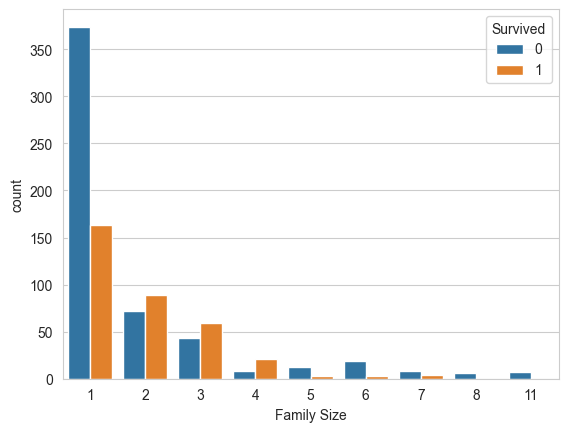

In [15]:
sns.countplot(x = 'Family Size', hue = 'Survived', data = train_data)

<AxesSubplot: xlabel='Family Size', ylabel='count'>

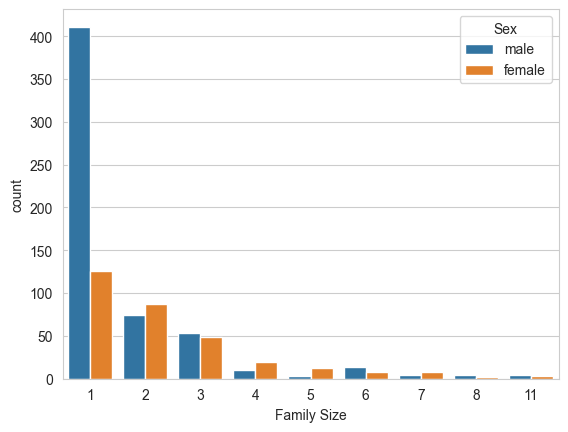

In [16]:
sns.countplot(x = 'Family Size', hue = 'Sex', data = train_data)

<AxesSubplot: xlabel='Age', ylabel='count'>

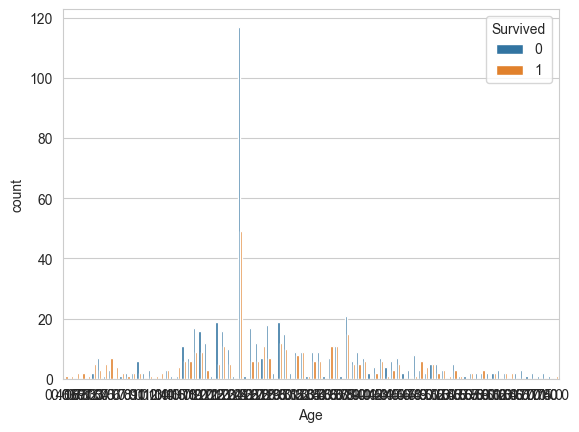

In [17]:
sns.countplot(x = 'Age', hue = 'Survived', data = train_data)

#### While trying to establish a relation about age and survival of the passenger we get a very cluttered graph so lets create age groups

In [18]:
age_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
train_data['Age Group'] = pd.cut(train_data.Age, range(0, 91, 10), right = False, labels = age_bins)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Age Group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,30-39
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,30-39
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,20-29
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,10-19
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,24.0,1,2,W./C. 6607,23.4500,S,4,20-29


In [19]:
train_data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Family Size    0
Age Group      0
dtype: int64

<AxesSubplot: xlabel='Age Group', ylabel='count'>

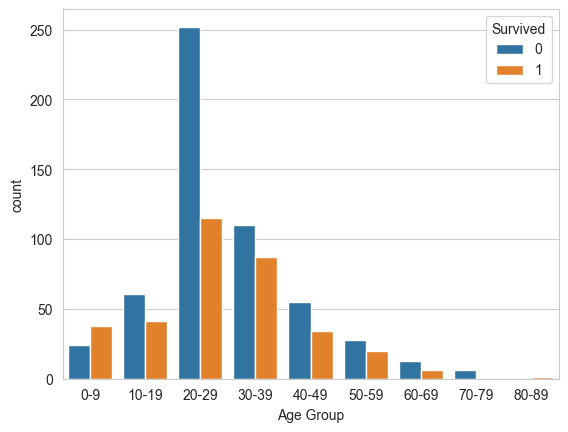

In [20]:
sns.countplot(x = 'Age Group', hue = 'Survived', data = train_data)

#### Now the plot seems readable

#### Lets create a plot that explains wether the price of the fare a passenger impacted his or her survival and also determine how many passenger boarded the ship from each port also did it impact their survival

In [21]:
train_data.Age = train_data.Age.astype(int)

In [22]:
survived_df = train_data.groupby(['Embarked']).mean()[['Survived']]
fare_df = train_data.groupby(['Embarked']).mean()[['Fare']]

C:\Users\unnikris\AppData\Local\Temp\ipykernel_3976\2520723305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_df = train_data.groupby(['Embarked']).mean()[['Survived']]
C:\Users\unnikris\AppData\Local\Temp\ipykernel_3976\2520723305.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fare_df = train_data.groupby(['Embarked']).mean()[['Fare']]


In [23]:
survived_df

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [24]:
fare_df

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


C:\Users\unnikris\AppData\Local\Temp\ipykernel_3976\346418348.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


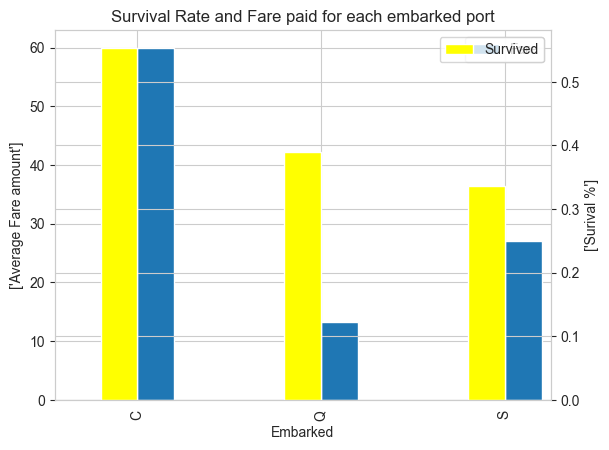

In [25]:
fig1 = plt.figure()
first_axis = fig1.add_subplot(111)
second_axis = first_axis.twinx()

fare_df.plot(kind = 'bar', grid = True, ax = first_axis, width = 0.2, position = 0)
survived_df.plot(kind = 'bar', color = 'yellow', ax = second_axis, grid= True, width = 0.2, position = 1)

first_axis.set_ylabel(['Average Fare amount'], loc = 'center')
second_axis.set_ylabel(['Surival %'], loc = 'center')

plt.title("Survival Rate and Fare paid for each embarked port")
fig1.show()

#### lets find did the port from which the passenger boarded impact their survival and also view it according to their gender 

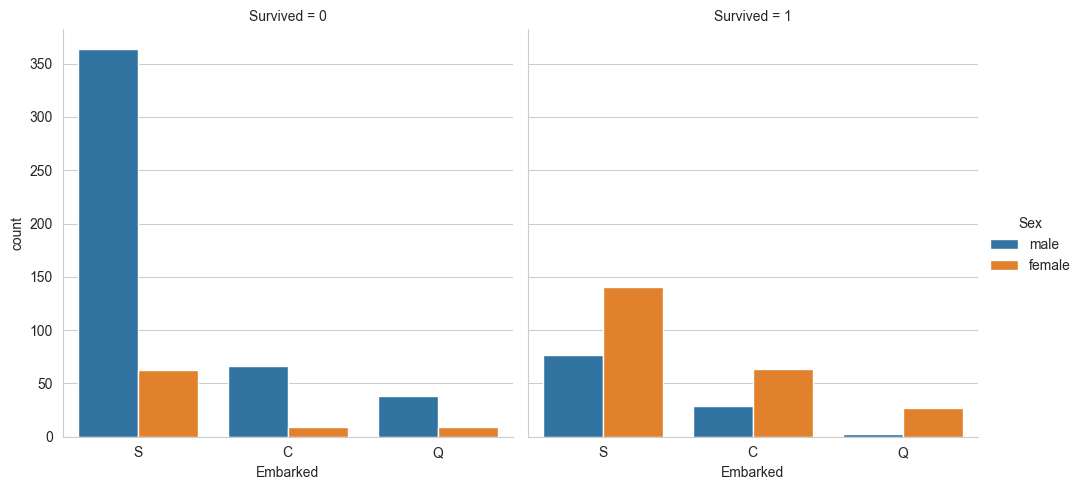

In [26]:
sns.catplot(x = 'Embarked', hue = "Sex", col = 'Survived', data = train_data, kind = 'count')

#### lets find did the class of the passenger impact their survival and also view it according to their gender 

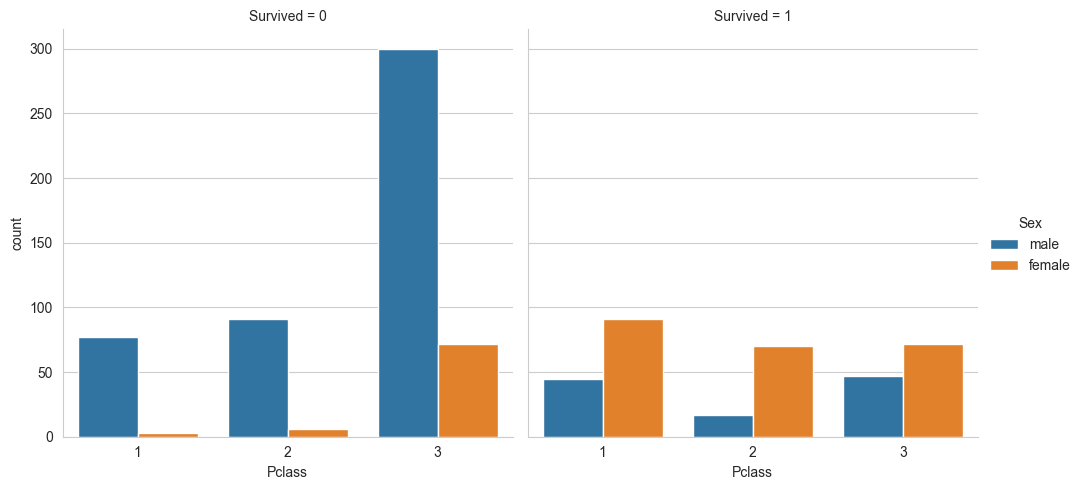

In [27]:
sns.catplot(x = 'Pclass', hue = "Sex", col = 'Survived', data = train_data, kind = 'count')

#### lets find did the fimily size of the passenger impact their survival and also view it according to their gender 

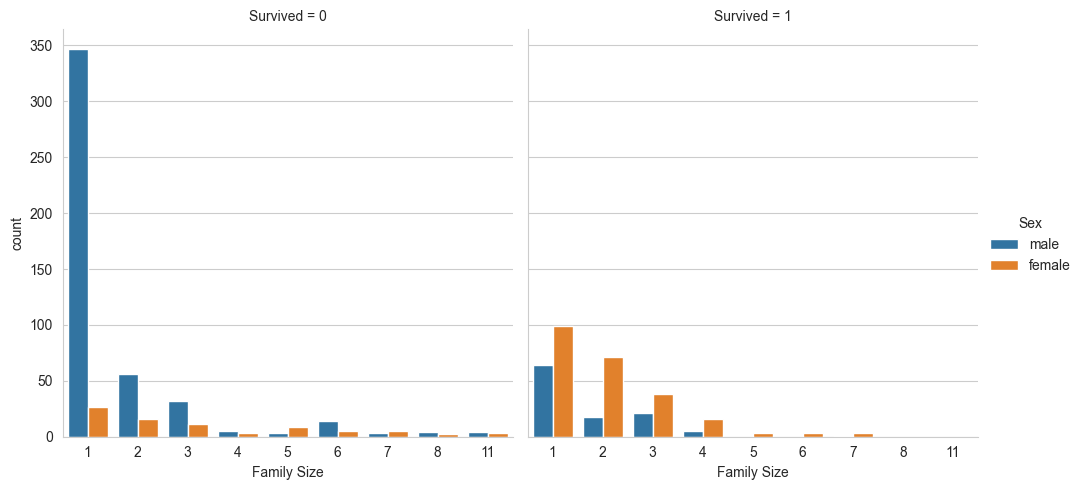

In [28]:
sns.catplot(x = 'Family Size', hue = "Sex", col = 'Survived', data = train_data, kind = 'count')

#### Lets create a pipeline for numerical data and categorical data

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipeline = Pipeline([
                ("imputer", SimpleImputer(strategy='median')),
                ("scaler", StandardScaler()),
])

In [31]:
cat_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder', OneHotEncoder(sparse=False)),
])

#### Transforming the data

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]


preprocess_pipline = ColumnTransformer([
                    ('num', num_pipeline, num_attribs),
                    ('cat', cat_pipeline, cat_attribs)
])

In [33]:
X_train = preprocess_pipline.fit_transform(train_data[num_attribs+cat_attribs])
X_train

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.53231008,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.67568299,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.23031181, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.38131094,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.23031181, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.22268559, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

#### Survived will be our labels

In [34]:
y_train = train_data['Survived']

#### As we r not predicting values we r perdicting a class of wether the person survived or not so using a clssifier to train the data

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
X_test = preprocess_pipline.transform(test_data[num_attribs+cat_attribs])
y_pred = forest_clf.predict(X_test)

#### Lets test how accurate this model is

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
forest_score = cross_val_score(forest_clf, X_train, y_train, cv=10)
print(forest_score, "\n", forest_score.mean())


[0.73333333 0.82022472 0.75280899 0.83146067 0.86516854 0.84269663
 0.80898876 0.7752809  0.84269663 0.86516854] 
 0.8137827715355807


#### Random Forest Classifier provided us a 81% accuracy
#
#### Lets try SVC

In [40]:
from sklearn.svm import SVC

In [41]:
sv_clf = SVC(gamma='auto')
sv_clf.fit(X_train, y_train)

SVC(gamma='auto')

#### Lets check how does SVC do

In [42]:
svc_score = cross_val_score(sv_clf, X_train, y_train, cv=10)
svc_score.mean()

0.8249313358302123

#### SVC did better but its not that significant of an increase lets test it using boxplot to get IQRs

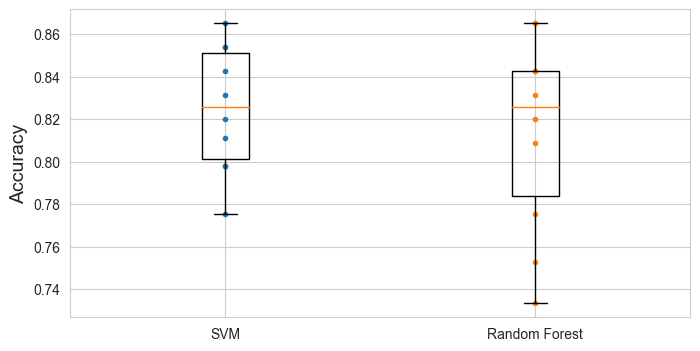

In [43]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svc_score, ".")
plt.plot([2]*10, forest_score, ".")
plt.boxplot([svc_score, forest_score], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

#### The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generalize well.